Коллок2 - Вариант1

1. Опишите теоретическую модель линейной регрессии.

Имеем вектор признаков Х и хотим подобрать такие веса для каждого Хi (wi) и свободный коэффициент w0, чтобы максимально приблизиться к истинному вектору у (target). То есть для каждого набора признаков необходимо получать в предсказании число.

Находим коэффициенты таким образом, чтобы максимально "приблизить" прямую ко всем точкам. Для этого проверяем три основные метрики: MAE, MSE и R2.

Для регрессии можем использовать:

1. LinearRegression

2. Дерево Решений

3. Градиентный спуск

4. МНК

и другие

Алгоритм проведения:

1. Обработка данных - заполнение пропусков, работа с выбросами, тепловая карта (решения по коллинеарным признакам)

2. Разделение данных на вектор признаков и целевой вектор (результат)

3. Масштабирование признаков

4. Разделение выборки на train и test  (можно кроссвалидацию)

5. Обучение модели на train

6. Предсказание на test

7. Получение основных метрик

8. Обучение на всех данных

9. Предсказание на test-файле с предварительным шагами, как и train-файле

--------------------------------------------------------------------------------

2. Напишите следующий rод: сгенерируйте данные в виде набора точек; постройте регрессионную модель; оцените её точность; визуализируйте результат.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Генерируем данные
np.random.seed(0)
x = 2 * np.random.rand(100, 1)  # 100 случайных точек в диапазоне [0, 2]
y = 4 + 3 * x + np.random.randn(100, 1)  # Линейная зависимость с шумом - создать "разброс"

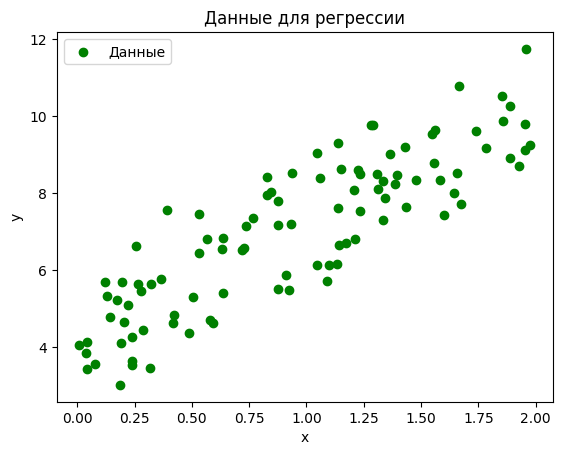

In [ ]:
plt.scatter(x, y, color='green', label='Данные')
plt.xlabel('х')
plt.ylabel('у')
plt.title('Данные для регрессии')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (85, 1), (85, 1)
Test dataset size: (15, 1), (15, 1)


In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(x_test, y_test))

MAE 0.8023616962725537
MSE 0.9248183932327498
R2 Score: 0.5828267714442901


In [ ]:
model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [ ]:
x_test = np.array([[0], [2]])  # Точки для предсказания
y_new = model.predict(x_test)

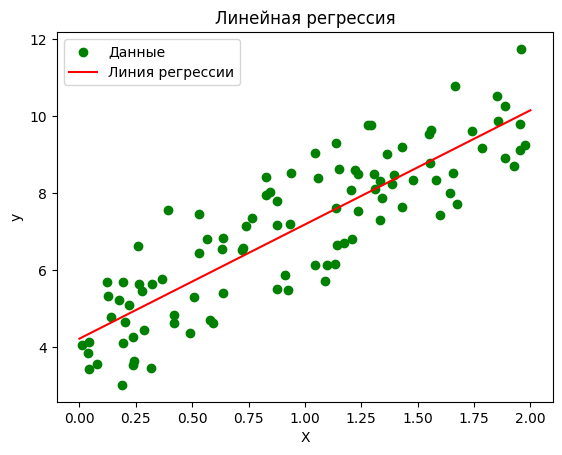

In [ ]:
plt.scatter(x, y, color='green', label='Данные')
plt.plot(x_test, y_new, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

--------------------------------------------------------------------------------

3. Опишите метрику для проверки качества алгоритмов классификации.

Confusion matrix -

In [ ]:
print('predict/actual    0    1')
print('0                 TN   FN')
print('1                 FP   TP')


predict/actual    0    1
0                 TN   FN
1                 FP   TP


TN - отриц класс и модель верно его предсказала

FN - модель неверно опред отриц класс, хотя он положит

TP - верное срабатывание - класс положит и модель дала верный результат

FP - модель опред положит класс, хотя элемент из отриц

Точность

Precision = TP/(FP+TP)

Верные срабатывания на общее кол-во срабатываний

В идеале - стремление к 1

Полнота

Recall = TP/(FN+TP)

Кол-во истинно положит к кол-ву всех результатов классиф положит (и когда их определили положит истинно и когда их отнесли к отриц классу ложно)

В идеале - стремление к 1

"Аккуратность"

Accuracity = TN+TP/(TN+TP+FN+FP)

В идеале стремится к 1 - то есть у нас нет ошибок классификации

F1 (score) = 2 * Recall * Precision/(Recall+Precision)

Среднее гармоническое точности и полноты - очень полезна для несбалансированных классов

--------------------------------------------------------------------------------